In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa as lib
import librosa.display
import IPython.display as ipd

from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
audio_files = glob('D:/Adria Tisnawati A/Matkul Polindra/Semester6/jurnal persiapan/Khusus Training/datasets/**/*.wav', recursive=True)

In [3]:
# Play audio file
ipd.Audio(audio_files[0])

In [4]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.00193046 0.00275735 0.00235826 0.0026243  0.00237984 0.00242188
 0.00228822 0.00242585 0.00232046 0.00233514]
shape y: (183054,)
sr: 22050


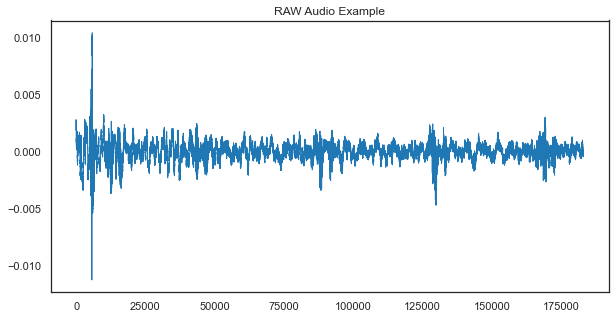

In [5]:
pd.Series(y).plot(figsize=(10, 5),
                 lw=1,
                 title='RAW Audio Example',
                 color=color_pal[0])
plt.show()

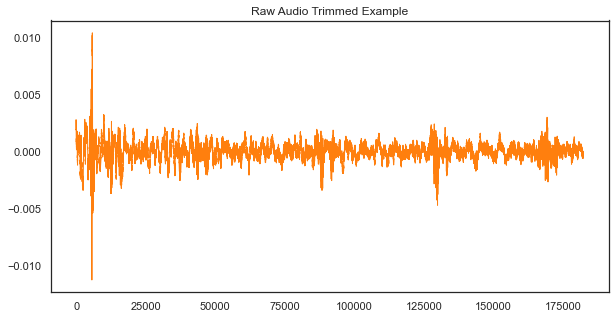

In [8]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                         lw=1,
                         title='Raw Audio Trimmed Example',
                        color=color_pal[1])
plt.show()

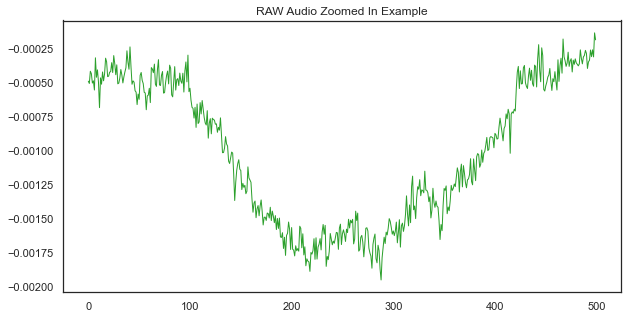

In [9]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                 lw=1,
                 title='RAW Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [10]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 358)

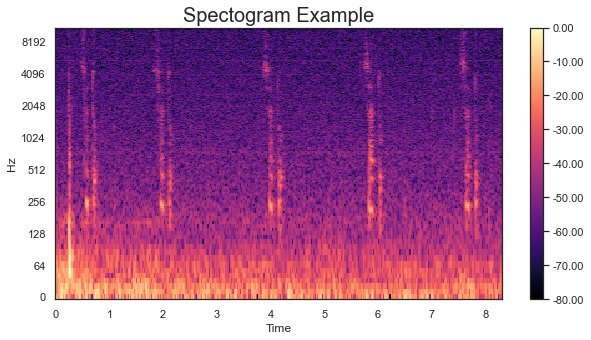

In [15]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [19]:
S = librosa.feature.melspectrogram(y=y,
                                 sr=sr,
                                 n_mels=128, )
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

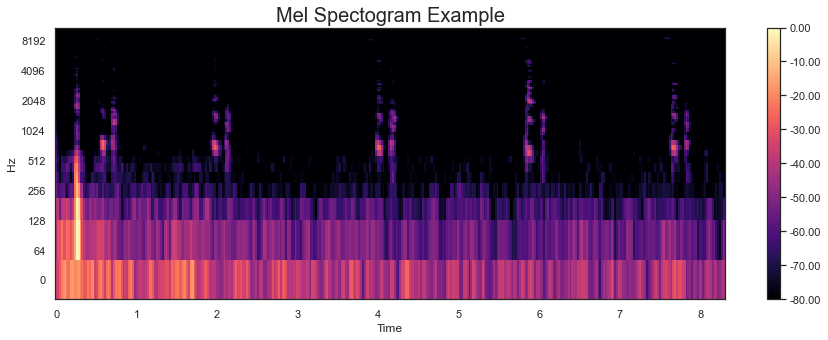

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [21]:
S_db_mel

array([[-34.161533, -33.87558 , -28.127373, ..., -47.48961 , -42.9226  ,
        -41.54017 ],
       [-41.19198 , -30.445457, -30.423477, ..., -75.01706 , -60.700043,
        -49.381554],
       [-38.814087, -38.981567, -52.92122 , ..., -73.03526 , -71.82936 ,
        -63.95011 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)